### Parte 02 -  Deslocamento temporal da função de onda




#### a equação da função de onda  completa:

$$i\hbar\frac{\partial\Psi}{\partial t}=\text{op }H\Psi$$

#### O opH é um operador de evolução temporal. Pode,ele, também assumir, a seguinte identidade matemática:
$$\text{op }U(\Delta t)=e^{\frac{-i\text{ op }H}{\hbar}}$$


#### Resultando, portanto, na solução, descrita abaixo:

$$\Psi(x,t+\Delta t)=e^{\frac{-i\text{ op }H\Delta t}{\hbar}}\cdot\Psi(x,t)$$

#### Podendo tratar o expoente de um operador, por meio de uma série infinita, tem-se:
$$e^{\frac{-i\text{ op }H\Delta t}{\hbar}}=\sum_{n}\frac{\Big(\frac{-i\text{ op }H\Delta t}{\hbar}\Big)^{n}}{n!}$$

In [12]:
#Bibliotecas

import matplotlib.animation as animation
from IPython.display import HTML
import matplotlib.pyplot as plt
import scipy.fftpack as fft         
import scipy.linalg as scl         
import numpy as np
import math                         
%matplotlib widget
%matplotlib inline



#### O Hamiltoniano no espaço:

$x_{n}=x_{0}+n\Delta x$, com $\Delta x =\frac{(x_{N}-x_{0})}{N}$

#### Os valores de entrada:


In [16]:
hbar = 1
m = 1
N = 2**11    
L = 200.0
step_low = 0.
step_high= 1.
V0 = 10.

#### Definição do espaço:

In [18]:
n = np.arange(N)
x0 = -L/2.
xN = L/2.
Delta_x = (xN - x0)/N
print("Delta_x = ",Delta_x)

x = x0 + n*Delta_x

Delta_x =  0.09765625


#### Definição do potencial:

In [20]:
V = np.zeros(N)
for i in range(N):
    if x[i]>= step_low and x[i]<= step_high:
        V[i]= V0

#### Configuração do Hamiltoniano para a função `V`, multiplicação com a matriz inversa:

In [22]:
Mdd = 1./(Delta_x**2)*(np.diag(np.ones(N-1),-1) 
                       - 2* np.diag(np.ones(N),0) 
                       + np.diag(np.ones(N-1),1))
H = -(hbar*hbar)/(2.0*m)*Mdd + np.diag(V) 

En,psiT = np.linalg.eigh(H)   # autovalores e os autovetores.
psi = np.transpose(psiT)      # Tomamos a transposta de psiT para os vetores de função de onda
                              # que podem ser acessados como psi[n]

#### Intervalo temporal

In [24]:
dt_max = 2/np.max(En)      # Critério de estabilidade.
dt = 0.001
if dt > dt_max:
    print("ATENÇÃO: dt está na região instável!")

#### Função de onda inicial

In [26]:
g_x0=-10.
g_k0=6.
g_sig=2.

##### Definição de um Gaussiano no espaço K, com $p=\hbar k$, um momento $k_{0} $,                                     e o espaço x, $\psi(x,0)=\big(\frac{2L}{\pi}\big)^{1/4}\cdot e^{-Lx^{2}}$:



In [28]:
def psi0(x,g_x0,g_k0,g_sig):
    _Norm_x=np.sqrt(Delta_x/g_sig)/(np.pi**0.25)
    
    return(_Norm_x*np.exp(-(x-g_x0)**2/(2.*g_sig*g_sig)+1j*g_k0*x))

psi_t0 = psi0(x,g_x0,g_k0,g_sig)

In [29]:
# H é Hermitiano?
print("Verifique se H é realmente Hermitiano : ",np.array_equal(H.conj().T,H)) 

Verifique se H é realmente Hermitiano :  True


In [30]:
Ut_mat = np.diag(np.ones(N,dtype="complex128"),0)

print("Criação de uma matriz U(dt = {})".format(dt))
for n in range(1,3):  
    # Realiza a soma. Como se trata de matrizes, o processo irá demorar se N for grande.
    Ut_mat += np.linalg.matrix_power((-1j*dt*H/hbar),n)/math.factorial(n)

Criação de uma matriz U(dt = 0.001)


In [31]:
p = Ut_mat.dot(psi_t0)

print("O quanto a normalização muda por etapa? Desde {} até {}".format(np.linalg.norm(psi_t0),np.linalg.norm(p)))
print("Nº de etapas em que a norma está errada por um fator 2 : ",1/(np.linalg.norm(p)-1))

O quanto a normalização muda por etapa? Desde 1.0 até 1.0000000127814086
Nº de etapas em que a norma está errada por um fator 2 :  78238637.96537858


#### teste do movimento gaussiano:

In [33]:
psi_t0 = psi0(x,g_x0,g_k0,g_sig)
psi_t1 = psi_t0
psi_tu = []

for t in range(3500):
    psi_t1 = Ut_mat.dot(psi_t1)
    if t>0 and t%500==0:
        psi_tu.append( (t,psi_t1))
psi_tu.append( (t,psi_t1))

#### Teste e verificação de coerência dos resultados:
##### $<E>$ = estado esperado da energia;
##### $<x>$ =  estado esperado da posição

In [35]:
print("Normalização : ",np.linalg.norm(psi_tu[-1][1]))

vev_E0=float(np.real(np.sum(np.conjugate(psi_t0)*H.dot(psi_t0))))
vev_x0=float(np.real(np.sum(np.conjugate(psi_t0)*x*psi_t0)))

print("<E_(t = 0)> = {:8.4f}  <x_(t = 0)> = {:8.4f}".format(vev_E0,vev_x0))

for t,p in psi_tu:
    norm = np.linalg.norm(p)
    vev_E1 = float(np.real(np.sum(np.conjugate(p)*H.dot(p))))
    vev_x1 = float(np.real(np.sum(np.conjugate(p)*x*p)))
    print("dt = {:7.1f}  norm = {:8.5f}  <E> = {:8.4f}  <x_(dt)> = {:8.4g}".format(t,norm,vev_E1,vev_x1))

Normalização :  1.000044736361259
<E_(t = 0)> =  17.5429  <x_(t = 0)> = -10.0000
dt =   500.0  norm =  1.00001  <E> =  17.5432  <x_(dt)> =   -7.164
dt =  1000.0  norm =  1.00001  <E> =  17.5434  <x_(dt)> =   -4.335
dt =  1500.0  norm =  1.00002  <E> =  17.5436  <x_(dt)> =    -1.55
dt =  2000.0  norm =  1.00003  <E> =  17.5439  <x_(dt)> =   0.8044
dt =  2500.0  norm =  1.00003  <E> =  17.5441  <x_(dt)> =     2.91
dt =  3000.0  norm =  1.00004  <E> =  17.5443  <x_(dt)> =    5.103
dt =  3499.0  norm =  1.00004  <E> =  17.5446  <x_(dt)> =    7.305


#### Dos dados obtidos, resulta:

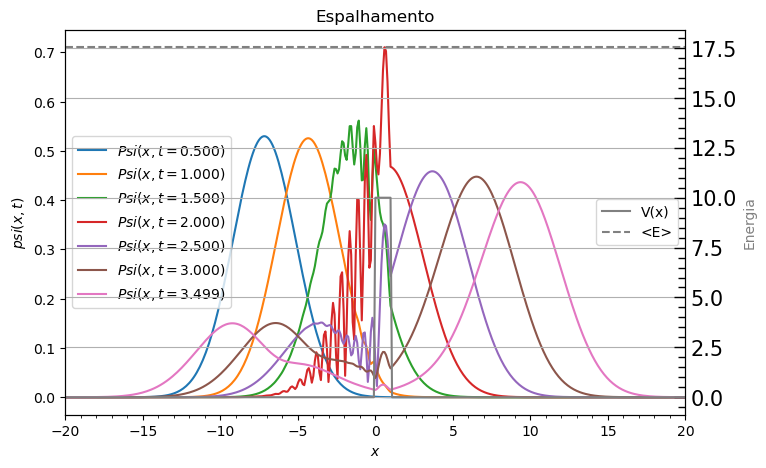

In [37]:
def opt_plot():
    plt.minorticks_on()
    plt.tick_params(axis='both',which='minor', direction = "in",
                    top = True,right = True, length=5,width=1,
                    labelsize=15)
    plt.tick_params(axis='both',which='major', direction = "in",
                    top = True,right = True, length=8,width=1,
                    labelsize=15)


plt.figure(figsize=(8,5))

if vev_E0>max(V):
    plt.title('Espalhamento')
else:
    plt.title('Tunelamento')
plt.ylabel('$psi(x,t)$')
plt.xlabel('$x$')
# plt.plot(x,np.abs(psi_t0)/np.sqrt(Delta_x),label="$\Psi(x,t=0)$")

for t,p in psi_tu:
    
    plt.plot(x,np.abs(p)/np.sqrt(Delta_x),label="$Psi(x,t={:6.3f})$".format(t*dt))
    plt.legend(loc = 'center left')
    
ax1 = plt.twinx()
plt.plot(x,V,color="grey",label="V(x)")
plt.plot([x[0],x[N-1]],[vev_E0,vev_E0],color="grey",linestyle="--",label="<E>")
plt.ylabel("Energia",color="grey")
plt.xlim(g_x0-5*g_sig,-g_x0+5*g_sig)
plt.legend(loc='best')
plt.grid()
opt_plot()

plt.savefig('Estado deslocado.png')

In [38]:
%time Ut_05s = np.linalg.matrix_power(Ut_mat,int(0.5/dt) )

CPU times: total: 2min
Wall time: 1min 15s


#### Repetição de tarefa

In [40]:
psi_t0 = psi0(x,g_x0,g_k0,g_sig)
psi_t1 = psi_t0
psi_tu05 = []

for t in range(7):
    psi_t1 = Ut_05s.dot(psi_t1)
    psi_tu05.append( (t,psi_t1))
    # psi_tu.append( (t,psi_t1))
print("Start")
v1=[]
v2=[]
tm=[]
count=0
for t,p in psi_tu05:
    norm = np.linalg.norm(p)
    vev_E1 = float(np.real(np.sum(np.conjugate(p)*H.dot(p))))
    vev_x1 = float(np.real(np.sum(np.conjugate(p)*x*p)))
    v1.append(vev_E1)

    v2.append(vev_x1)
    tm.append(count)
    count=count+1
    print("dt = {:7.1f}  norm = {:8.5f}  <E> = {:8.4f}  <x_(dt)> = {:8.4g}".format(t,norm,vev_E1,vev_x1))

Start
dt =     0.0  norm =  1.00001  <E> =  17.5432  <x_(dt)> =    -7.17
dt =     1.0  norm =  1.00001  <E> =  17.5434  <x_(dt)> =    -4.34
dt =     2.0  norm =  1.00002  <E> =  17.5436  <x_(dt)> =   -1.555
dt =     3.0  norm =  1.00003  <E> =  17.5439  <x_(dt)> =   0.8002
dt =     4.0  norm =  1.00003  <E> =  17.5441  <x_(dt)> =    2.905
dt =     5.0  norm =  1.00004  <E> =  17.5443  <x_(dt)> =    5.099
dt =     6.0  norm =  1.00004  <E> =  17.5446  <x_(dt)> =    7.305


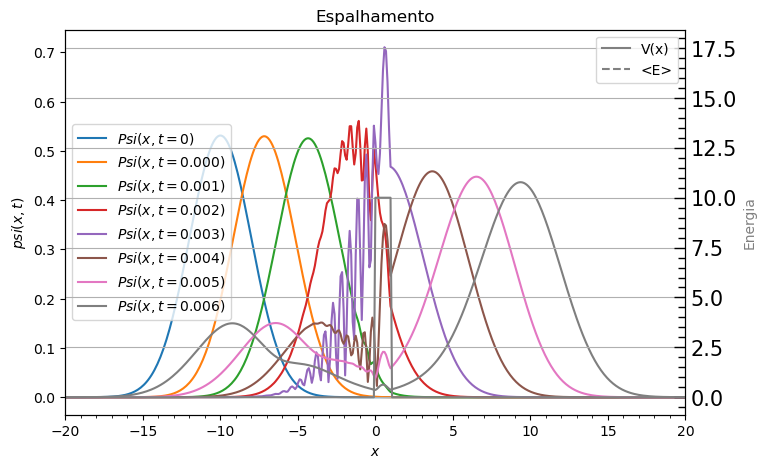

In [41]:
plt.figure(figsize=(8,5))

if vev_E0>max(V):
    plt.title('Espalhamento')
else:
    plt.title('Tunelamento')
plt.ylabel('$psi(x,t)$')
plt.xlabel('$x$')
line, = plt.plot(x,np.abs(psi_t0)/np.sqrt(Delta_x),label="$Psi(x,t=0)$")

for t,p in psi_tu05:
    plt.plot(x,np.abs(p)/np.sqrt(Delta_x),label="$Psi(x,t={:6.3f})$".format(t*dt))
    plt.legend(loc='center left')
    
ax1 = plt.twinx()    
plt.plot(x,V,color="grey",label="V(x)")
plt.plot([x[0],x[6]],[vev_E0,vev_E0],color="grey",linestyle="--",label="<E>")
plt.ylabel("Energia",color="grey")
plt.xlim(g_x0-5*g_sig,-g_x0+5*g_sig)
plt.legend(loc='best')
plt.grid()
opt_plot()

plt.savefig('Estado deslocado - Pré-computados.png')

## Parte 3 - A Regressão Simbólica

In [43]:
from sklearn.utils import check_random_state, shuffle
from gplearn.genetic import SymbolicRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.utils.random import check_random_state
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import Image
import pydot
import graphviz 
from sympy import *
import pandas as pd

### Definição dos Operadores

In [45]:
converter = {
    'sub': lambda x, y : x - y,
     'div': lambda x, y : x/y,
    'mul': lambda x, y : x*y,
    'add': lambda x, y : x + y,
    'neg': lambda x    : -x,
    'pow': lambda x, y : x**y,
    'sin': lambda x    : sin(x),
    'cos': lambda x    : cos(x),
    'inv': lambda x: 1/x,
    'sqrt': lambda x: x**0.5,
    'pow3': lambda x: x**3
}

#### Interpretação Probabilística Gaussiana da Distribuição Normal
$$N(\mu,\sigma^{2})=\frac{1}{\sqrt{2\pi\sigma^{2}}}\cdot e^{-\frac{1}{2}\frac{(x-\mu)}{\sigma}^{2}}$$:

In [47]:
m1=[]
md=[]
count=0
tem=0
df=pd.DataFrame()
df2=pd.DataFrame()
xix=[]
df['v1']=v1
df2['v2']=v2

for i in v2:
    m1.append(i)
    tem=i-vev_x0
    md.append(tem**2)
df['m1']=md
df2['t']=tm

   

dp=2.83/3
A = [float(i) for i in m1]
for i in A:
    xix=np.linspace(-(3.*dp),(3.*dp),40)
    y=0.39*(2.76**(-0.5*(xix**2)))


### A amostra acima, resulta: 

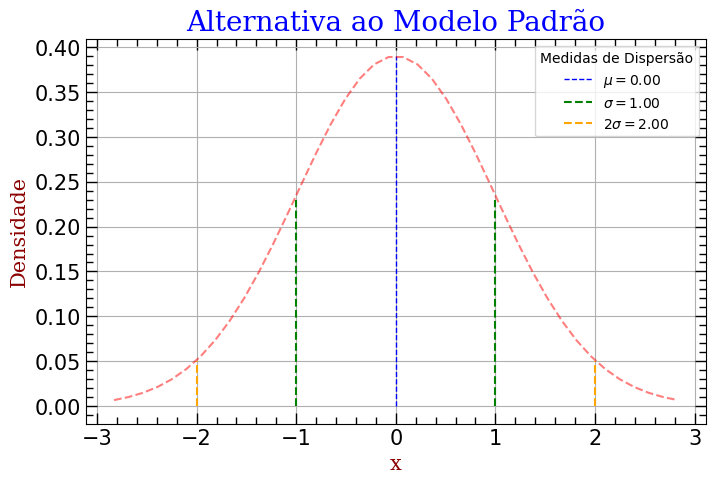

In [49]:
def opt_plot():
    plt.minorticks_on()
    plt.tick_params(axis='both',which='minor', direction = "in",
                    top = True,right = True, length=5,width=1,
                    labelsize=15)
    plt.tick_params(axis='both',which='major', direction = "in",
                    top = True,right = True, length=8,width=1,
                    labelsize=15)
plt.figure(figsize=(8,5))

textstr = '\n'.join((
    r'$\mu=%.2f$' % (0, ),
    ))

textstr02 = '\n'.join((
    r'$\sigma=%.2f$' % (1, ),
))

textstr03 = '\n'.join((
    r'$\sigma=%.2f$' % (2, ),
))

textstr04 = '\n'.join((
    r'$\sigma=%.2f$' % (1, ),
    r'$\mu=%.2f$' % (0, ),
))

plt.vlines(0, 0, 0.39, linestyle='dashed', color='b', linewidth=1, label=str(textstr)) # vlines(posição, início, fim)
plt.vlines(1, 0, 0.23, linestyle='dashed', color='green', linewidth=1.5, label= str(textstr02)) # vlines(posição, início, fim)
plt.vlines(-1, 0, 0.23, linestyle='dashed', color='green', linewidth=1.5) # vlines(posição, início, fim)
plt.vlines(2, 0, 0.05, linestyle='dashed', color='orange', linewidth=1.5, label= '2'+str(textstr03)) # vlines(posição, início, fim)
plt.vlines(-2, 0, 0.05, linestyle='dashed', color='orange', linewidth=1.5) # vlines(posição, início, fim)

font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

plt.title("Alternativa ao Modelo Padrão", fontdict = font1)
plt.xlabel("x", fontdict = font2)
plt.ylabel("Densidade", fontdict = font2)

plt.legend(title='Medidas de Dispersão')    
plt.grid()

opt_plot()
plt.plot(xix,y ,'r--', alpha=0.5, label= textstr04)

### Criação e Calibração de um modelo Simbólico Regressor:

In [51]:
function_set = ['add', 'sub', 'mul', 'div','cos','sin','neg','inv']
# Instanciação
est_gp = SymbolicRegressor(population_size=5000,
                           generations=20,function_set=function_set,
                           stopping_criteria=0.01,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.01, random_state=0)
# Ajuste
est_gp.fit(xix.reshape(-1, 1),y)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    15.94          8.42754       24         0.101256         0.141842      2.44m
   1     8.38          1.41838       10        0.0282817        0.0287366      2.23m
   2     4.25         0.913171       10        0.0275074        0.0357058      1.91m
   3     2.38         0.458598       10        0.0262319        0.0471853      1.68m
   4     2.34          69.5123       10        0.0262295        0.0472067      1.63m
   5     4.42          1.11605       11        0.0181481        0.0271488      1.57m
   6     6.21          1.40624       11        0.0183373        0.0356987      1.49m
   7     6.89          1.00531       11        0.0196629        0.0237683      1.53m
   8     7.20          0.86294       11        0.0185499        0.0337846  

SymbolicRegressor(function_set=['add', 'sub', 'mul', 'div', 'cos', 'sin', 'neg',
                                'inv'],
                  max_samples=0.9, p_crossover=0.7, p_hoist_mutation=0.05,
                  p_point_mutation=0.1, p_subtree_mutation=0.1,
                  parsimony_coefficient=0.01, population_size=5000,
                  random_state=0, stopping_criteria=0.01, verbose=1)

#### Escore:

In [53]:
print('R2:',est_gp.score(xix.reshape(-1, 1),y))
next_e = sympify(str(est_gp._program), locals=converter)
y1=next_e

R2: 0.9502743138806782


#### Equação Proposta:

In [55]:
y1

0.333/(0.696*X0**2 + 0.812)

### Soluções para o Poço de Potencial Infinito


#### Solução da função de onda da posição
$$ \psi_n(x) = \sqrt{\frac{2}{L}} \sin\left(\frac{n\pi x}{L}\right)$$


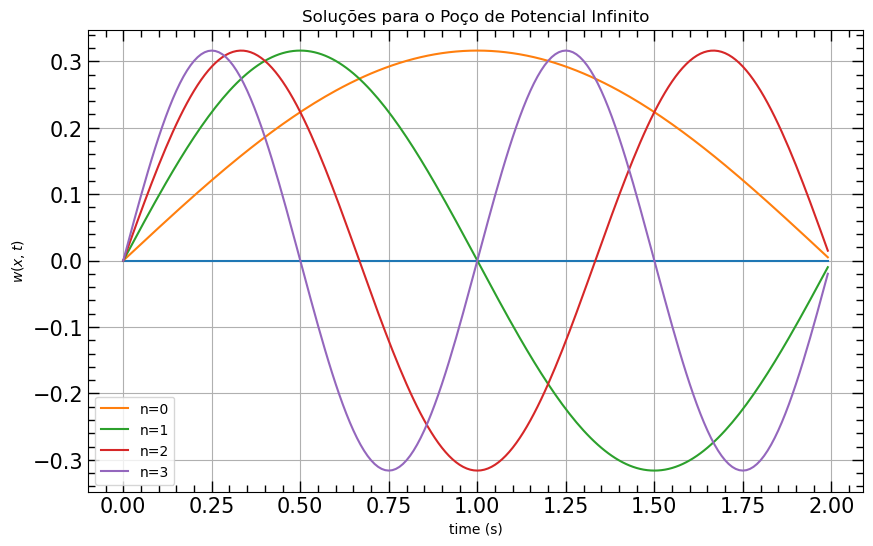

In [58]:
import matplotlib.pyplot as plt
import numpy as np
def opt_plot():
    plt.minorticks_on()
    plt.tick_params(axis='both',which='minor', direction = "in",
                    top = True,right = True, length=5,width=1,
                    labelsize=15)
    plt.tick_params(axis='both',which='major', direction = "in",
                    top = True,right = True, length=8,width=1,
                    labelsize=15)


a=20
A=np.sqrt(2/a)
# Data for plotting
for i in range(5):
    t = np.arange(0.0, 2.0, 0.01)
    s = A*np.sin(0 * np.pi * t)
s1 = A*+np.sin(0.5 * np.pi * t)
s2 = A*np.sin(1.0 * np.pi * t)
s3 = A*np.sin(1.5 * np.pi * t )
s4 = A*np.sin(2.0 * np.pi * t)


fig, ax = plt.subplots(figsize=(10,6))


ax.plot(t, s)
ax.plot(t, s1,label='n=0')
ax.plot(t, s2,label='n=1')
ax.plot(t, s3,label='n=2')
ax.plot(t, s4,label='n=3')


ax.set(xlabel='time (s)', ylabel='$w(x,t)$',
       title="Soluções para o Poço de Potencial Infinito")
ax.grid()
opt_plot()

plt.legend()

fig.savefig("test.png")
plt.show()


#### Gera-se e ajusta-se,um modelo Simbólico Regressor para a solução da função de onda da Posição:

In [60]:
est_gp.fit(t.reshape(-1, 1),s1)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    15.94          10.9162        6        0.0305686        0.0286007      2.70m
   1     8.25          1.36407        9        0.0238001        0.0246281      2.65m
   2     5.03         0.916274        9        0.0248264        0.0153917      2.21m
   3     2.76         0.458664        7        0.0265144         0.031241      2.49m
   4     2.38          16.2677        7         0.026512        0.0312625      1.71m
   5     5.04         0.628504        6        0.0142702           0.0251      1.70m
   6     6.00          1.07399        6        0.0145615        0.0224778      1.70m
   7     6.08         0.645816        6        0.0137287        0.0299735      1.32m
   8     6.07         0.686379        6         0.013608        0.0310599  

SymbolicRegressor(function_set=['add', 'sub', 'mul', 'div', 'cos', 'sin', 'neg',
                                'inv'],
                  max_samples=0.9, p_crossover=0.7, p_hoist_mutation=0.05,
                  p_point_mutation=0.1, p_subtree_mutation=0.1,
                  parsimony_coefficient=0.01, population_size=5000,
                  random_state=0, stopping_criteria=0.01, verbose=1)

#### Escore

In [62]:
print('R2:',est_gp.score(t.reshape(-1, 1),s1))
next_e = sympify(str(est_gp._program), locals=converter)
y2=next_e

R2: 0.9048979343134357


### Equação Proposta

In [64]:
y2

-0.517*X0 + sin(X0)

#### Solução para o espectro energético
$$E_n = \frac{n^2 \pi^2 \hbar^2}{2mL^2}$$
#### Verificando os níveis de energia:

In [66]:
import numpy as np
a=1
h=1
m=1
En=0
Enn=[]
for i in range(7):
    En=((i**2)*(h**2)*(np.pi**2))/(2*m*a*a)    
    Enn.append(En)

for i in range(7):
    n = i+1
    print("E[{}] = {:9.4f}".format(n,Enn[i],n, n*n*np.pi**2*h*h/(2*m*a*a)))


E[1] =    0.0000
E[2] =    4.9348
E[3] =   19.7392
E[4] =   44.4132
E[5] =   78.9568
E[6] =  123.3701
E[7] =  177.6529


#### Gráfico da Energia Quantizada:

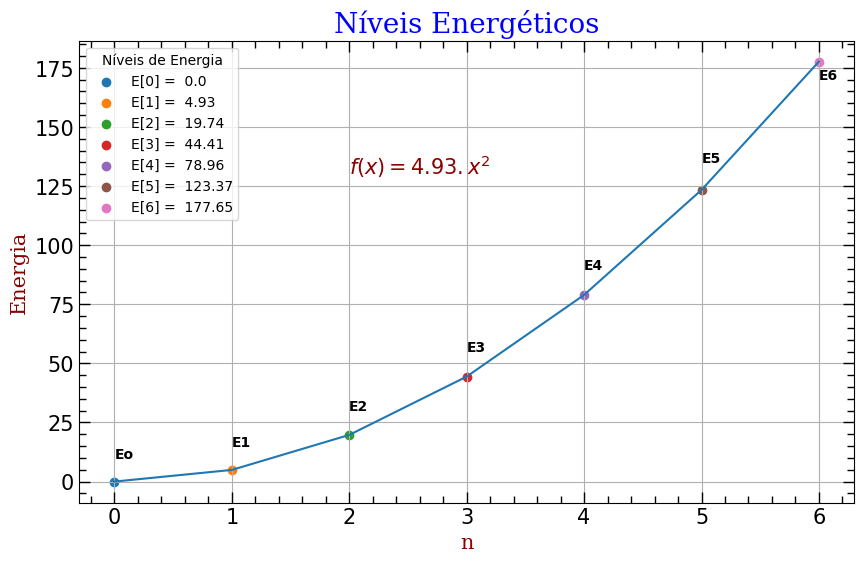

In [68]:
def opt_plot():
    plt.minorticks_on()
    plt.tick_params(axis='both',which='minor', direction = "in",
                    top = True,right = True, length=5,width=1,
                    labelsize=15)
    plt.tick_params(axis='both',which='major', direction = "in",
                    top = True,right = True, length=8,width=1,
                    labelsize=15)

plt.figure(figsize=(10, 6))
plt.plot(Enn)
plt.text(x=0.0, y=10, s="Eo", weight="bold")
plt.text(x=1.0, y=15, s="E1", weight="bold")
plt.text(x=2.0, y=30, s="E2", weight="bold")
plt.text(x=3.0, y=55, s="E3", weight="bold")
plt.text(x=4.0, y=90, s="E4", weight="bold")
plt.text(x=5.0, y=135, s="E5", weight="bold")
plt.text(x=6.0, y=170, s="E6", weight="bold")

for i in range(7):
    En=((i**2)*(h**2)*(np.pi**2))/(2*m*a*a)    

    plt.scatter(i,En, marker='o',label="E["+str(i)+"] =  "+str(round(Enn[i],2)))

font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

plt.title("Níveis Energéticos", fontdict = font1)
plt.xlabel("n", fontdict = font2)
plt.ylabel("Energia", fontdict = font2)
plt.text(x=2.0, y=130, s=r'$f(x) = 4.93.{x^2}$',fontdict = font2)

plt.legend(title='Níveis de Energia')    
opt_plot()

plt.grid()

#### Para:

In [70]:
l_count=np.linspace(0,6,7)
E_df=np.array([l_count,Enn])
E_df02=E_df.T
E_df02
y_E=4.93*E_df[:,0]**2


### Obtem-se o seguinte modelo:

In [72]:
function_set = ['add', 'sub', 'mul', 'div','cos','sin','neg','inv']
# Instanciação
est_gp = SymbolicRegressor(population_size=5000,
                           generations=20,function_set=function_set,
                           stopping_criteria=0.01,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.01, random_state=0)
# Ajuste
est_gp.fit(E_df,y_E)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    10.86      1.23511e+07       14                0                0      2.06m


SymbolicRegressor(function_set=['add', 'sub', 'mul', 'div', 'cos', 'sin', 'neg',
                                'inv'],
                  max_samples=0.9, p_crossover=0.7, p_hoist_mutation=0.05,
                  p_point_mutation=0.1, p_subtree_mutation=0.1,
                  parsimony_coefficient=0.01, population_size=5000,
                  random_state=0, stopping_criteria=0.01, verbose=1)

#### Cujo Escore é:

In [74]:
next_e = sympify(str(est_gp._program), locals=converter)
y3=next_e

#### com a proposta de equação:

In [76]:
y3

-0.362*X1/(X0*(cos(X2) - 0.198669330795061))

### Densidade de Probabilidade da posição 
$$|\psi_n(x)|^{2} = {\frac{2}{a}} \sin^{2}(n\pi x)$$

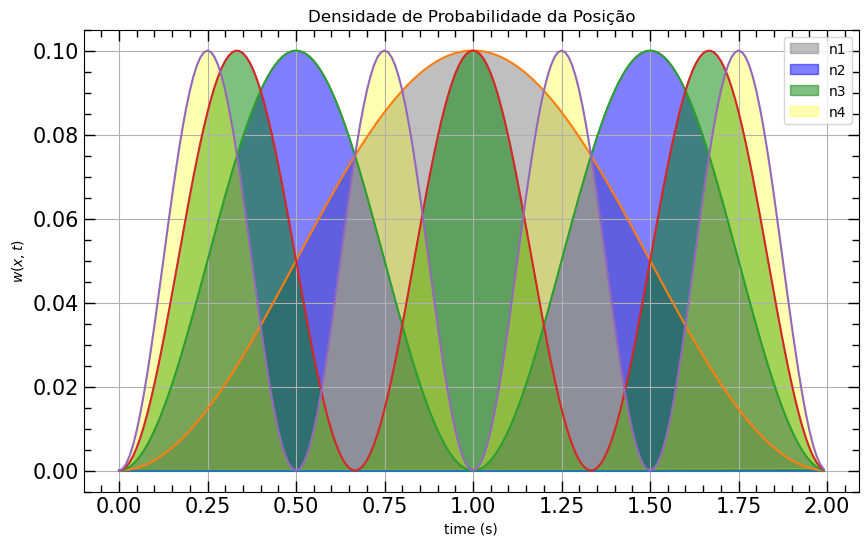

In [78]:
import matplotlib.pyplot as plt
import numpy as np

def opt_plot():
    plt.minorticks_on()
    plt.tick_params(axis='both',which='minor', direction = "in",
                    top = True,right = True, length=5,width=1,
                    labelsize=15)
    plt.tick_params(axis='both',which='major', direction = "in",
                    top = True,right = True, length=8,width=1,
                    labelsize=15)

val_esp=[-7.17,-4.344,-1.555,0.8002,2.905,5.095 ,7.305]

a=20
A=(2/a)
# Data for plotting
t = np.arange(0.0, 2.0, 0.01)
x=np.arange(0.0,2.0,0.01)

        
s = A*(np.sin((0 * np.pi * x)))**2

s1 = A*(np.sin((0.5 * np.pi * abs(x))))**2
s2 = A*(np.sin((1.0 * np.pi * x)))**2
s3 = A*(np.sin((1.5 * np.pi * x)))**2
s4 = A*(np.sin((2.0 * np.pi * x)))**2


fig, ax = plt.subplots(figsize=(10,6))
ax.plot(x, s)

ax.plot(x, s1)
ax.fill(x,s1,color='grey', alpha=0.5, label='n1')
ax.plot(x, s2)
ax.fill(x,s2,color='blue', alpha=0.5, label='n2')
ax.plot(x, s3)
ax.fill(x,s3,color='green', alpha=0.5, label='n3')
ax.plot(x, s4)
ax.fill(x,s4,color='yellow', alpha=0.3, label='n4')



ax.set(xlabel='time (s)', ylabel='$w(x,t)$',
       title="Densidade de Probabilidade da Posição")
ax.grid()
ax.legend()
opt_plot()

fig.savefig("test.png")
plt.show()

#### Relaciona-se os valores médios esperados, da funçao de onda,  com a função normal gaussiana:

In [80]:
val_esp=np.array([-7.17,-4.344,-1.555,0.8002,2.905,5.095 ,7.305])
niveis=[0,1,2,3,4,5,6]
arr_value=np.array([[niveis],[val_esp]])
x_arr = val_esp
print(x_arr)
y_arr=0.399*(2.76**(-0.5*x_arr[:]**2))


[-7.17   -4.344  -1.555   0.8002  2.905   5.095   7.305 ]


#### para então, modular:

In [82]:
function_set = ['add', 'sub', 'mul', 'div','cos','sin','neg','inv']
# Instanciação
est_gp = SymbolicRegressor(population_size=5000,
                           generations=20,function_set=function_set,
                           stopping_criteria=0.01,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.01, random_state=0)
# Ajuste
est_gp.fit(x_arr.reshape(-1,1),y_arr)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    15.94          24.2581        9        0.0150923         0.125521      2.32m
   1     9.25          3.10342       29         0.001741         0.390678      2.51m


SymbolicRegressor(function_set=['add', 'sub', 'mul', 'div', 'cos', 'sin', 'neg',
                                'inv'],
                  max_samples=0.9, p_crossover=0.7, p_hoist_mutation=0.05,
                  p_point_mutation=0.1, p_subtree_mutation=0.1,
                  parsimony_coefficient=0.01, population_size=5000,
                  random_state=0, stopping_criteria=0.01, verbose=1)

#### Escore:

In [84]:
print('R2:',est_gp.score(x_arr.reshape(-1,1),y_arr))
next_e = sympify(str(est_gp._program), locals=converter)
y2_arr=next_e

R2: -1.099778938698206


#### Equaçao:

In [86]:
y2_arr

sin(cos(sin(X0 - 0.773) + 0.795601620036366)*cos(1/cos(X0))/(0.130625639531083 - 2*X0**3))

#####  O desvio padrão da posição:
$$\Delta xn ={\sqrt{ <x^{2}n> - <xn>^{2}}} = a{\sqrt{{\frac{1}{12}}- {\frac{1}{2\pi^{2}n^{2}}}}} $$

In [88]:
import pandas as pd
xx0=-10
val_esp=[-7.17,-4.344,-1.555,0.8002,2.905,5.095 ,7.305]
a=val_esp[6]-val_esp[0]
x_quadrado=0
dp=[]
n=1
desp=0
j=-10

c=0
dsp=[]
for i in val_esp:
    if (j<0 and i>0):
        c=np.abs(j)+i
    else:    
        c=np.abs(j)-np.abs(i)
        c=np.abs(c)
    dsp.append(c)
    j=i
dsp
er_count=0
err=[]
med_ex=2.86
for i in dsp:
    er_count=med_ex-i
    err.append(er_count)
err    
dpp=pd.DataFrame()
dpp['DesvioP']=dsp
dpp['ErrDesvioP']=err

dpp
    

,DesvioP,ErrDesvioP
0,2.8300,0.0300
1,2.8260,0.0340
2,2.7890,0.0710
3,2.3552,0.5048
4,2.1048,0.7552
5,2.1900,0.6700
6,2.2100,0.6500


##### Podemos encontrar, também, o desvio padrão do momento

$$e^{\frac{-i\text{ op }H\Delta t}{\hbar}}=\sum_{n}\frac{\Big(\frac{-i\text{ op }H\Delta t}{\hbar}\Big)^{n}}{n!}$$
$$\Delta Kn = <K^{2}n> - <Kn>^{2} = {\frac{n\hbar}{a}} $$

In [90]:
import numpy as np
a=20
    
h=1
dpm=0
dmp=[]
for i in range(7):
    a=np.abs(a)
    dpm=(i*np.pi)/a
    dmp.append(dpm)


#### O Princípio da Incerteza
$$\Delta x.\Delta p >\frac{\hbar}{2}$$

In [92]:
desvf=pd.DataFrame()
desvf["dp"]=dpp.DesvioP
desvf["dmp"]=dmp
j=0
incerteza=[]
form=[]
f=r'$\Delta x.\Delta p $'
g=r'$\Delta x $'
h=r'$\Delta p $'
c=0
gord=dpp.DesvioP
hord=dmp
for i in dpp.DesvioP:
   j=dmp[c]*i
   incerteza.append(j)
   form.append(f)


   c=c+1
desvf02=pd.DataFrame()
desvf02[g]=gord
desvf02[h]=hord
desvf02["lesquerdo"]=form
desvf02["incerteza"]=incerteza
desvf02

,$\Delta x $,$\Delta p $,lesquerdo,incerteza
0,2.8300,0.000000,$\Delta x.\Delta p $,0.000000
1,2.8260,0.157080,$\Delta x.\Delta p $,0.443907
2,2.7890,0.314159,$\Delta x.\Delta p $,0.876190
3,2.3552,0.471239,$\Delta x.\Delta p $,1.109862
4,2.1048,0.628319,$\Delta x.\Delta p $,1.322485
5,2.1900,0.785398,$\Delta x.\Delta p $,1.720022
6,2.2100,0.942478,$\Delta x.\Delta p $,2.082876


#### Regressão Simbólica entre os $\Delta x $ e $\Delta p $, como variáveis independentes.

In [94]:
from array import array
pr_in=[]
mul=0
co=0
for i in dp:
    mul=dmp[co]*i
    pr_in.append(mul)
    co=co+1
pr_in
l=np.linspace(-20,20,7)
est_gp.fit(desvf,l)


    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    14.12          17.3358       61          4.58152          2.20469      2.61m
   1    13.19          12.2287       63          2.01855          16.5301      2.67m
   2    22.91          12.5299       68          1.48236          19.5784      2.70m
   3    45.90          11.1265       67          1.35883          16.5595      2.79m
   4    57.10          8.42914       74           1.2534          16.1118      2.86m
   5    56.64          8.65533      103         0.940835          17.0272      2.81m
   6    55.98          8.42966       74         0.897443          18.0636      2.33m
   7    55.51          8.75305       89         0.915222          18.4083      2.30m
   8    54.16          8.32359       57          0.83206          5.84937  

SymbolicRegressor(function_set=['add', 'sub', 'mul', 'div', 'cos', 'sin', 'neg',
                                'inv'],
                  max_samples=0.9, p_crossover=0.7, p_hoist_mutation=0.05,
                  p_point_mutation=0.1, p_subtree_mutation=0.1,
                  parsimony_coefficient=0.01, population_size=5000,
                  random_state=0, stopping_criteria=0.01, verbose=1)

#### Escore:

In [96]:
print('R2:',est_gp.score(desvf,l))
next_e = sympify(str(est_gp._program), locals=converter)
y4=next_e

R2: 0.9974758366230793


#### Equação Proposta:

In [98]:
print(y4)

-X0/X1 + X1 + (sin(X1) + 3*X1/X0)*sin(X1) + sin(X0/X1 - X1 + 0.306590365235784 - sin(0.094/X1)/(X1 + 0.041) + 1/(0.046 - 0.094/X1))/(X1 + 0.041) - 1/(0.046 - 0.094/X1)


#### Regressão Simbólica entre os $\Delta x $ e $\Delta p $, como um produto entre ambas.

In [100]:
deltax=np.linspace(2.1,2.83,100)
deltap=np.linspace(0.15,0.94,100)
delta_dp=pd.DataFrame()
delta_dp['deltax']=deltax
delta_dp['deltap']=deltap
c=0
mult=[]
for i in deltax:
   j=deltap[c]*i
   mult.append(j)

   c=c+1
c_inf=0
mult_inf=[]
mult_sup=[]
for i in mult:
    if i<0.5:
        mult_inf.append(i)
        c_inf=c_inf+1
    else:
        mult_sup.append(i)


In [101]:
est_gp.fit(delta_dp,mult)


    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    14.12          9.75688        5                0                0      2.60m


SymbolicRegressor(function_set=['add', 'sub', 'mul', 'div', 'cos', 'sin', 'neg',
                                'inv'],
                  max_samples=0.9, p_crossover=0.7, p_hoist_mutation=0.05,
                  p_point_mutation=0.1, p_subtree_mutation=0.1,
                  parsimony_coefficient=0.01, population_size=5000,
                  random_state=0, stopping_criteria=0.01, verbose=1)

#### Escore:

In [103]:
print('R2:',est_gp.score(delta_dp,mult))
next_e = sympify(str(est_gp._program), locals=converter)
y5=next_e

R2: 1.0


#### Equação

In [105]:
print(y5)

X0*X1


### As Equações Sugeridas:

In [107]:
print('As Equações Sugeridas:')
print('____________')
print('')
print('I - y1(X0) =', y1)
print('-------')
print('II - y2(X0) =', y2)
print('-------')
print('III - y3(X0,X1,X2) =', y3)
print('-------')
print('IV - y2_arr(X0) = ',y2_arr)
print('-------')
print('V - y4(X0,X1) = ', y4)
print('-------')
print('VI - y5(X0,X1) = ', y5)
print('-------')


As Equações Sugeridas:
____________

I - y1(X0) = 0.333/(0.696*X0**2 + 0.812)
-------
II - y2(X0) = -0.517*X0 + sin(X0)
-------
III - y3(X0,X1,X2) = -0.362*X1/(X0*(cos(X2) - 0.198669330795061))
-------
IV - y2_arr(X0) =  sin(cos(sin(X0 - 0.773) + 0.795601620036366)*cos(1/cos(X0))/(0.130625639531083 - 2*X0**3))
-------
V - y4(X0,X1) =  -X0/X1 + X1 + (sin(X1) + 3*X1/X0)*sin(X1) + sin(X0/X1 - X1 + 0.306590365235784 - sin(0.094/X1)/(X1 + 0.041) + 1/(0.046 - 0.094/X1))/(X1 + 0.041) - 1/(0.046 - 0.094/X1)
-------
VI - y5(X0,X1) =  X0*X1
-------


In [108]:
print('I - y1(X0) =', end=" ") 
y1

I - y1(X0) = 

0.333/(0.696*X0**2 + 0.812)

In [109]:
y2

-0.517*X0 + sin(X0)

In [110]:
y3

-0.362*X1/(X0*(cos(X2) - 0.198669330795061))

In [111]:
y4

-X0/X1 + X1 + (sin(X1) + 3*X1/X0)*sin(X1) + sin(X0/X1 - X1 + 0.306590365235784 - sin(0.094/X1)/(X1 + 0.041) + 1/(0.046 - 0.094/X1))/(X1 + 0.041) - 1/(0.046 - 0.094/X1)

In [112]:
y5

X0*X1

In [113]:
X0=1
y2_arr

sin(cos(sin(X0 - 0.773) + 0.795601620036366)*cos(1/cos(X0))/(0.130625639531083 - 2*X0**3))